# Artificial Neural Networks and Deep Learning

---

## Homework 1: VGG16 82%


## 🌐 Connect Colab to Google Drive

In [ ]:
from google.colab import drive

drive.mount('/gdrive')
%cd /gdrive/My Drive/DeepL Team/Lorenzo

## ⚙️ Import Libraries

In [ ]:
%%capture
pip install keras-cv

In [ ]:
# Set seed for reproducibility
seed = 42

# Import necessary libraries
import os

# Set environment variables before importing modules
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd() + '/configs/'

# Suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

# Import necessary modules
import logging
import random
import numpy as np

# Set seeds for random number generators in NumPy and Python
np.random.seed(seed)
random.seed(seed)

# Import TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl

# Set seed for TensorFlow
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

# Reduce TensorFlow verbosity
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Print TensorFlow version
print(tf.__version__)

# Import other libraries
import requests
from io import BytesIO
import cv2
from PIL import Image
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')

import keras_cv
from keras_cv.layers import AugMix, RandAugment

# Configure plot display settings
sns.set(font_scale=1.4)
sns.set_style('white')
plt.rc('font', size=14)
%matplotlib inline

2.17.1


## ⏳ Load the Data

In [ ]:
data_train=np.load('../data_augmented.npz')
data_val=np.load("../data_validation.npz")
images_train=data_train["images"]
labels_train=data_train["labels"]
images_val=data_val["images"]
labels_val=data_val["labels"]
images_val, images_test, labels_val, labels_test = train_test_split(
    images_val,
    labels_val,
    test_size=459,
    random_state=seed,
    stratify=labels_val
)
del data_train
del data_val

In [ ]:
print(images_train.shape)
print(labels_train.shape)
print(images_val.shape)
print(labels_val.shape)
print(images_test.shape)
print(labels_test.shape)

(16000, 96, 96, 3)
(16000, 8)
(1500, 96, 96, 3)
(1500, 8)
(459, 96, 96, 3)
(459, 8)


In [ ]:
input_shape = images_train.shape[1:]
print(f'Input shape of the network {input_shape}')

output_shape = labels_train.shape[1]
print(f'Output shape of the network {output_shape}')

Input shape of the network (96, 96, 3)
Output shape of the network 8


## 🛠️ Train the Model

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ cast (Cast)                          │ (None, 96, 96, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 96, 96, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 96, 96, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 48, 48, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 48, 48, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 24, 24, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 24, 24, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 12, 12, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d                 │ (None, 512)                 │               0 │
│ (GlobalMaxPooling2D)                 │                             │              

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

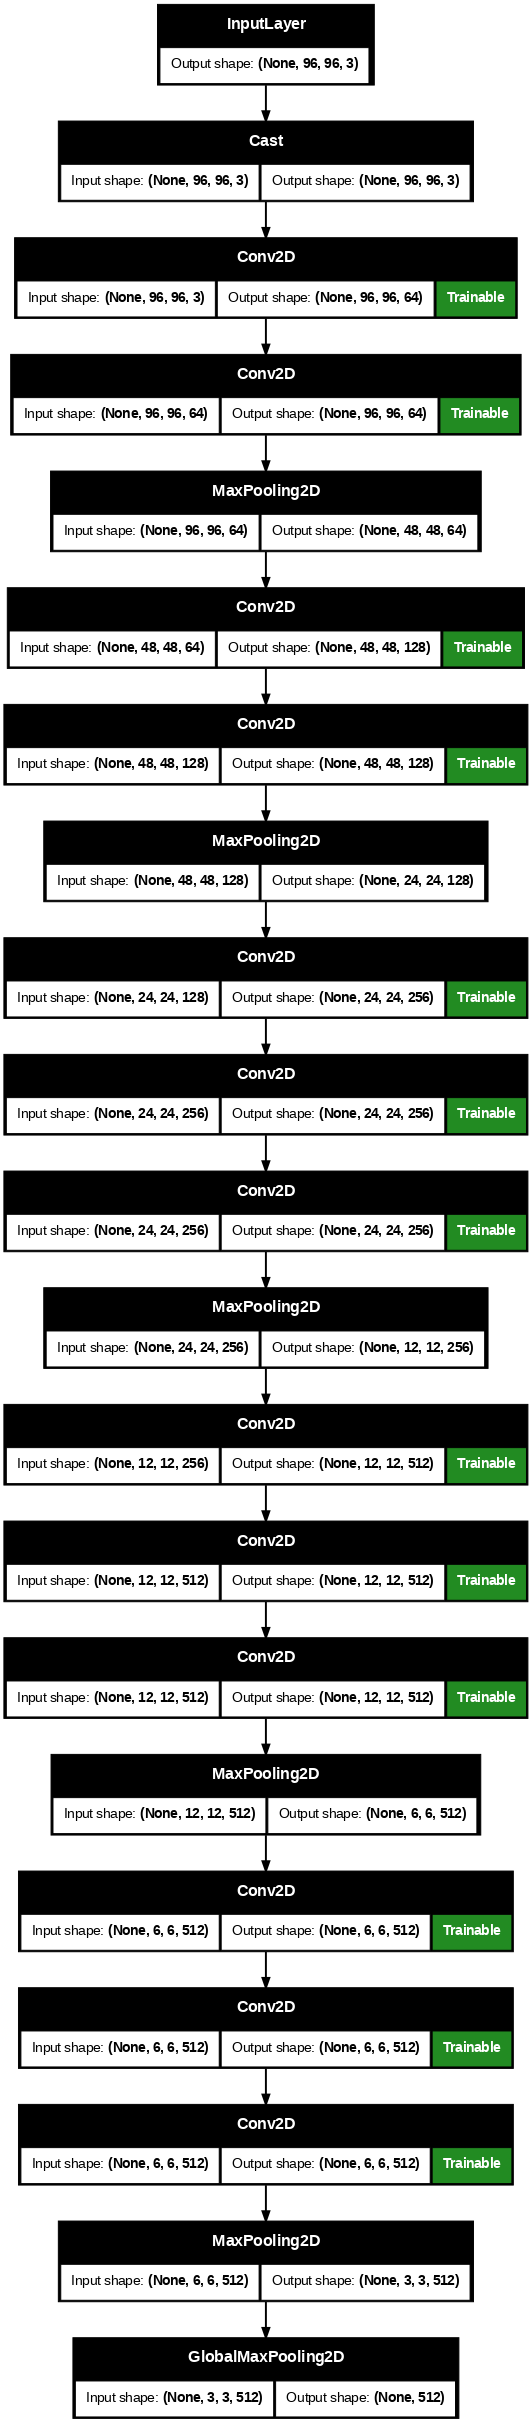

In [ ]:
base_model = tfk.applications.VGG16(
    input_shape=(96, 96, 3),
    include_top=False,
    weights='imagenet',
    pooling='max'
)

# Display a summary of the model architecture
base_model.summary(expand_nested=True)

# Display model architecture with layer shapes and trainable parameters
tfk.utils.plot_model(base_model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 96, 96, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item (GetItem)        │ (None, 96, 96)         │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_1 (GetItem)      │ (None, 96, 96)         │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_2 (GetItem)      │ (None, 96, 96)         │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stack (Stack)             │ (None, 96, 96, 3)      │              0 │ get_item[0][0],        │
│                           │                        │                │ get_item_1[0][0],      │
│                           │                        │                │ get_item_2[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 96, 96, 3)      │              0 │ stack[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ vgg16 (Functional)        │ (None, 512)            │     14,714,688 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│    └ input_layer          │ (None, 96, 96, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│    └ block1_conv1         │ (None, 96, 96, 64)     │          1,792 │ -                      │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│    └ block1_conv2         │ (None, 96, 96, 64)     │         36,928 │ -                      │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│    └ block1_pool          │ (None, 48, 48, 64)     │              0 │ -                      │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│    └ block2_conv1         │ (None, 48, 48, 128)    │         73,856 │ -                      │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│    └ block2_conv2         │ (None, 48, 48, 128)    │        147,584 │ -                      │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│    └ block2_pool          │ (None, 24, 24, 128)    │              0 │ -                      │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│    └ block3_conv1         │ (None, 24, 24, 256)    │        295,168 │ -                      │
│ (Conv2D)             

 Total params: 14,849,096 (56.64 MB)

 Trainable params: 133,896 (523.03 KB)

 Non-trainable params: 14,715,200 (56.13 MB)

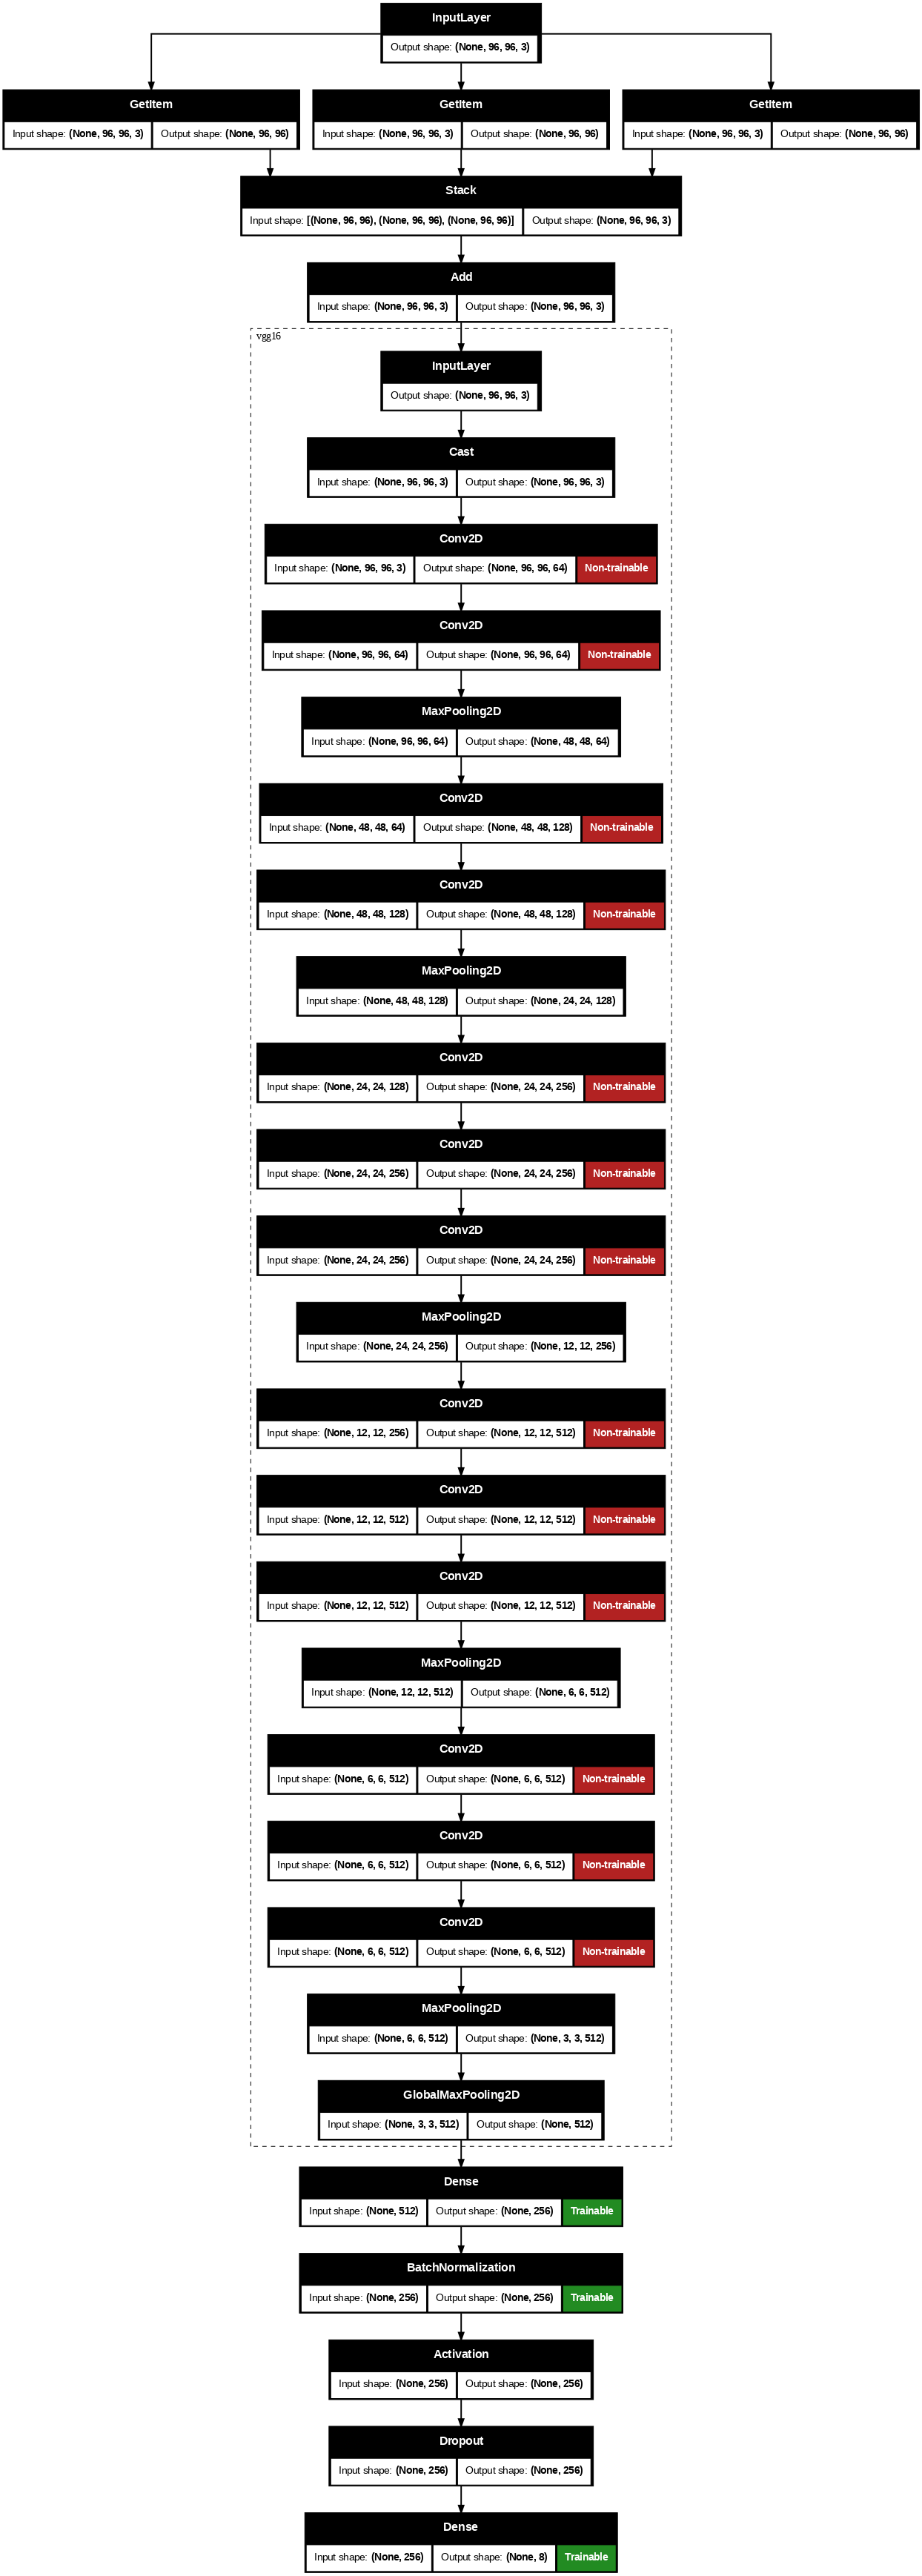

In [ ]:
# Freeze all layers in VGG16 to use it solely as a feature extractor
base_model.trainable = False

# Define input layer with shape matching the input images
inputs = tfk.Input(shape=(96, 96, 3), name='input_layer')

#Apply data augmentation for training robustness
#augmentation = tf.keras.Sequential([
#    AugMix(value_range=(0, 1), alpha=0.2),
#    RandAugment(value_range=(0, 1), magnitude=0.5)
#], name='preprocessing')


# Pass augmented inputs through the VGG16 feature extractor
#x = augmentation(inputs)

x=tf.keras.applications.vgg16.preprocess_input(inputs)

x = base_model(x)

# Add a dropout layer for regularisation

x = tfkl.Dense(units=256, name='dense1')(x)

x= tfkl.BatchNormalization(name='batchnorm1')(x)

x = tfkl.Activation('relu', name='HiddenActivation1')(x)

x = tfkl.Dropout(0.3, name='dropout')(x)

# Add final Dense layer for classification with softmax activation
outputs = tfkl.Dense(labels_train.shape[-1], activation='softmax', name='dense')(x)

# Define the complete model linking input and output
tl_model = tfk.Model(inputs=inputs, outputs=outputs, name='model')

# Compile the model with categorical cross-entropy loss and Adam optimiser
tl_model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Lion(learning_rate=0.0001, beta_1=0.9, beta_2=0.99), metrics=['accuracy'])

# Display a summary of the model architecture
tl_model.summary(expand_nested=True)

# Display model architecture with layer shapes and trainable parameters
tfk.utils.plot_model(tl_model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

In [ ]:
# Train the model
tl_history = tl_model.fit(
    x=images_train,
    y=labels_train,
    batch_size=50,
    epochs=200,
    validation_data=(images_val, labels_val),
    callbacks=[tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=10, restore_best_weights=True)]
).history

# Calculate and print the best validation accuracy achieved
final_val_accuracy = round(max(tl_history['val_accuracy']) * 100, 2)
print(f'Final validation accuracy: {final_val_accuracy}%')

# Save the trained model to a file, including final accuracy in the filename
model_filename = '8_TL.keras'
tl_model.save(model_filename)

print(tl_model.evaluate(images_test, labels_test))

# Free memory by deleting the model instance
del tl_model

Epoch 1/200
320/320 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.2886 - loss: 2.0049 - val_accuracy: 0.6447 - val_loss: 1.0069
Epoch 2/200
320/320 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.5827 - loss: 1.1617 - val_accuracy: 0.7187 - val_loss: 0.7942
Epoch 3/200
320/320 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.6345 - loss: 1.0064 - val_accuracy: 0.7407 - val_loss: 0.7398
Epoch 4/200
320/320 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.6708 - loss: 0.8990 - val_accuracy: 0.7560 - val_loss: 0.7027
Epoch 5/200
320/320 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7043 - loss: 0.8311 - val_accuracy: 0.7487 - val_loss: 0.7032
Epoch 6/200
320/320 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.7255 - loss: 0.7719 - val_accuracy: 0.7507 - val_loss: 0.6910
Epoch 7/200
320/320 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.7446 - loss: 0.7159 - val_accuracy: 0.7507 - val_loss: 0.7041
Epoch 8/200
320/320 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.7705 - loss: 0.6596 

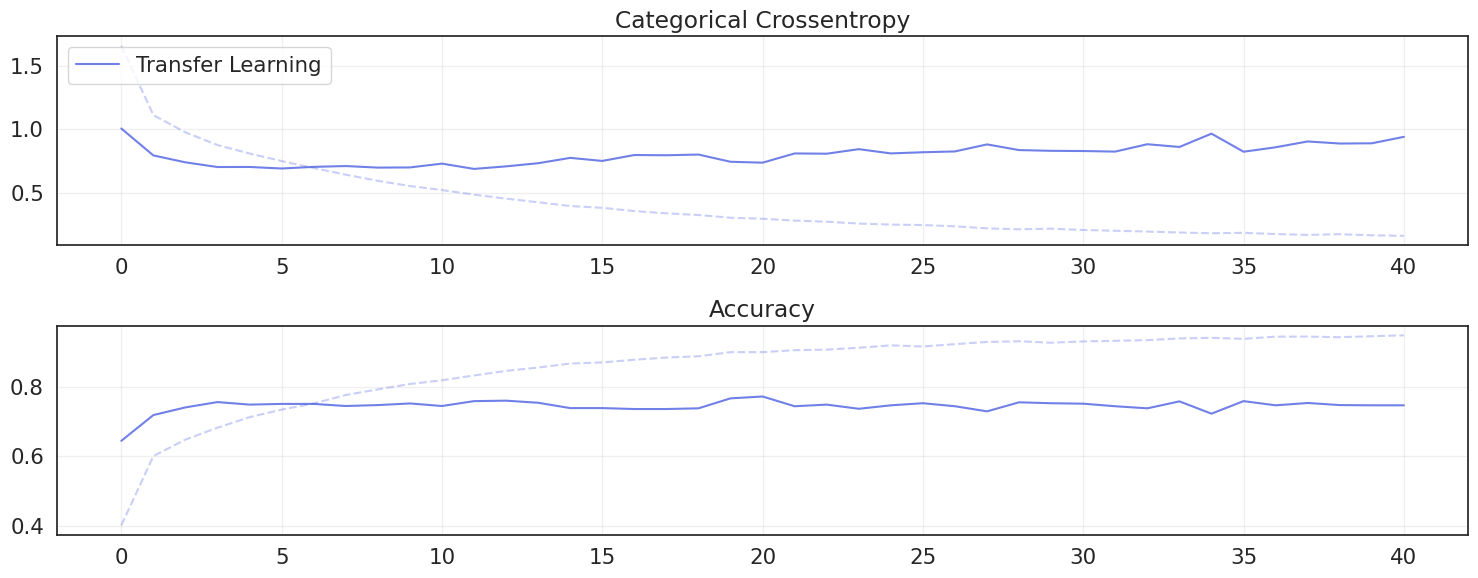

In [ ]:
# Create figure and subplots for loss and accuracy
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 6))

# Plot loss for both re-trained and transfer learning models
ax1.plot(tl_history['loss'], alpha=0.3, color='#4D61E2', linestyle='--')
ax1.plot(tl_history['val_loss'], label='Transfer Learning', alpha=0.8, color='#4D61E2')
ax1.set_title('Categorical Crossentropy')
ax1.legend(loc='upper left')
ax1.grid(alpha=0.3)

# Plot accuracy for both re-trained and transfer learning models
ax2.plot(tl_history['accuracy'], alpha=0.3, color='#4D61E2', linestyle='--')
ax2.plot(tl_history['val_accuracy'], label='Transfer Learning', alpha=0.8, color='#4D61E2')
ax2.set_title('Accuracy')
ax2.grid(alpha=0.3)

# Adjust layout to prevent label overlap and display the plots
plt.tight_layout()
plt.show()

## 📊 Save the model

In [ ]:
%%writefile model.py
import numpy as np

import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl


class Model:
    def __init__(self):
        """
        Initialize the internal state of the model. Note that the __init__
        method cannot accept any arguments.

        The following is an example loading the weights of a pre-trained
        model.
        """
        self.neural_network = tfk.models.load_model('8_TL.keras')

    def predict(self, X):
        """
        Predict the labels corresponding to the input X. Note that X is a numpy
        array of shape (n_samples, 96, 96, 3) and the output should be a numpy
        array of shape (n_samples,). Therefore, outputs must no be one-hot
        encoded.

        The following is an example of a prediction from the pre-trained model
        loaded in the __init__ method.
        """
        if X.max() < 2:
            X = (X * 255.0).astype('float32')  # Normalize to the range [0, 1]

        preds = self.neural_network.predict(X)
        if len(preds.shape) == 2:
            preds = np.argmax(preds, axis=1)
        return preds

Writing model.py


In [ ]:
from datetime import datetime
filename = f'submission_{datetime.now().strftime("%y%m%d_%H%M%S")}.zip'

# Add files to the zip command if needed
!zip {filename} model.py 8_TL.keras

from google.colab import files
files.download(filename)

  adding: model.py (deflated 54%)
  adding: 8_TL.keras (deflated 7%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Fine tuning

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 96, 96, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item (GetItem)        │ (None, 96, 96)         │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_1 (GetItem)      │ (None, 96, 96)         │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_2 (GetItem)      │ (None, 96, 96)         │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stack (Stack)             │ (None, 96, 96, 3)      │              0 │ get_item[0][0],        │
│                           │                        │                │ get_item_1[0][0],      │
│                           │                        │                │ get_item_2[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 96, 96, 3)      │              0 │ stack[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ vgg16 (Functional)        │ (None, 512)            │     14,714,688 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│    └ input_layer          │ (None, 96, 96, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│    └ block1_conv1         │ (None, 96, 96, 64)     │          1,792 │ -                      │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│    └ block1_conv2         │ (None, 96, 96, 64)     │         36,928 │ -                      │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│    └ block1_pool          │ (None, 48, 48, 64)     │              0 │ -                      │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│    └ block2_conv1         │ (None, 48, 48, 128)    │         73,856 │ -                      │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│    └ block2_conv2         │ (None, 48, 48, 128)    │        147,584 │ -                      │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│    └ block2_pool          │ (None, 24, 24, 128)    │              0 │ -                      │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│    └ block3_conv1         │ (None, 24, 24, 256)    │        295,168 │ -                      │
│ (Conv2D)             

 Total params: 14,982,998 (57.16 MB)

 Trainable params: 133,896 (523.03 KB)

 Non-trainable params: 14,715,200 (56.13 MB)

 Optimizer params: 133,902 (523.07 KB)

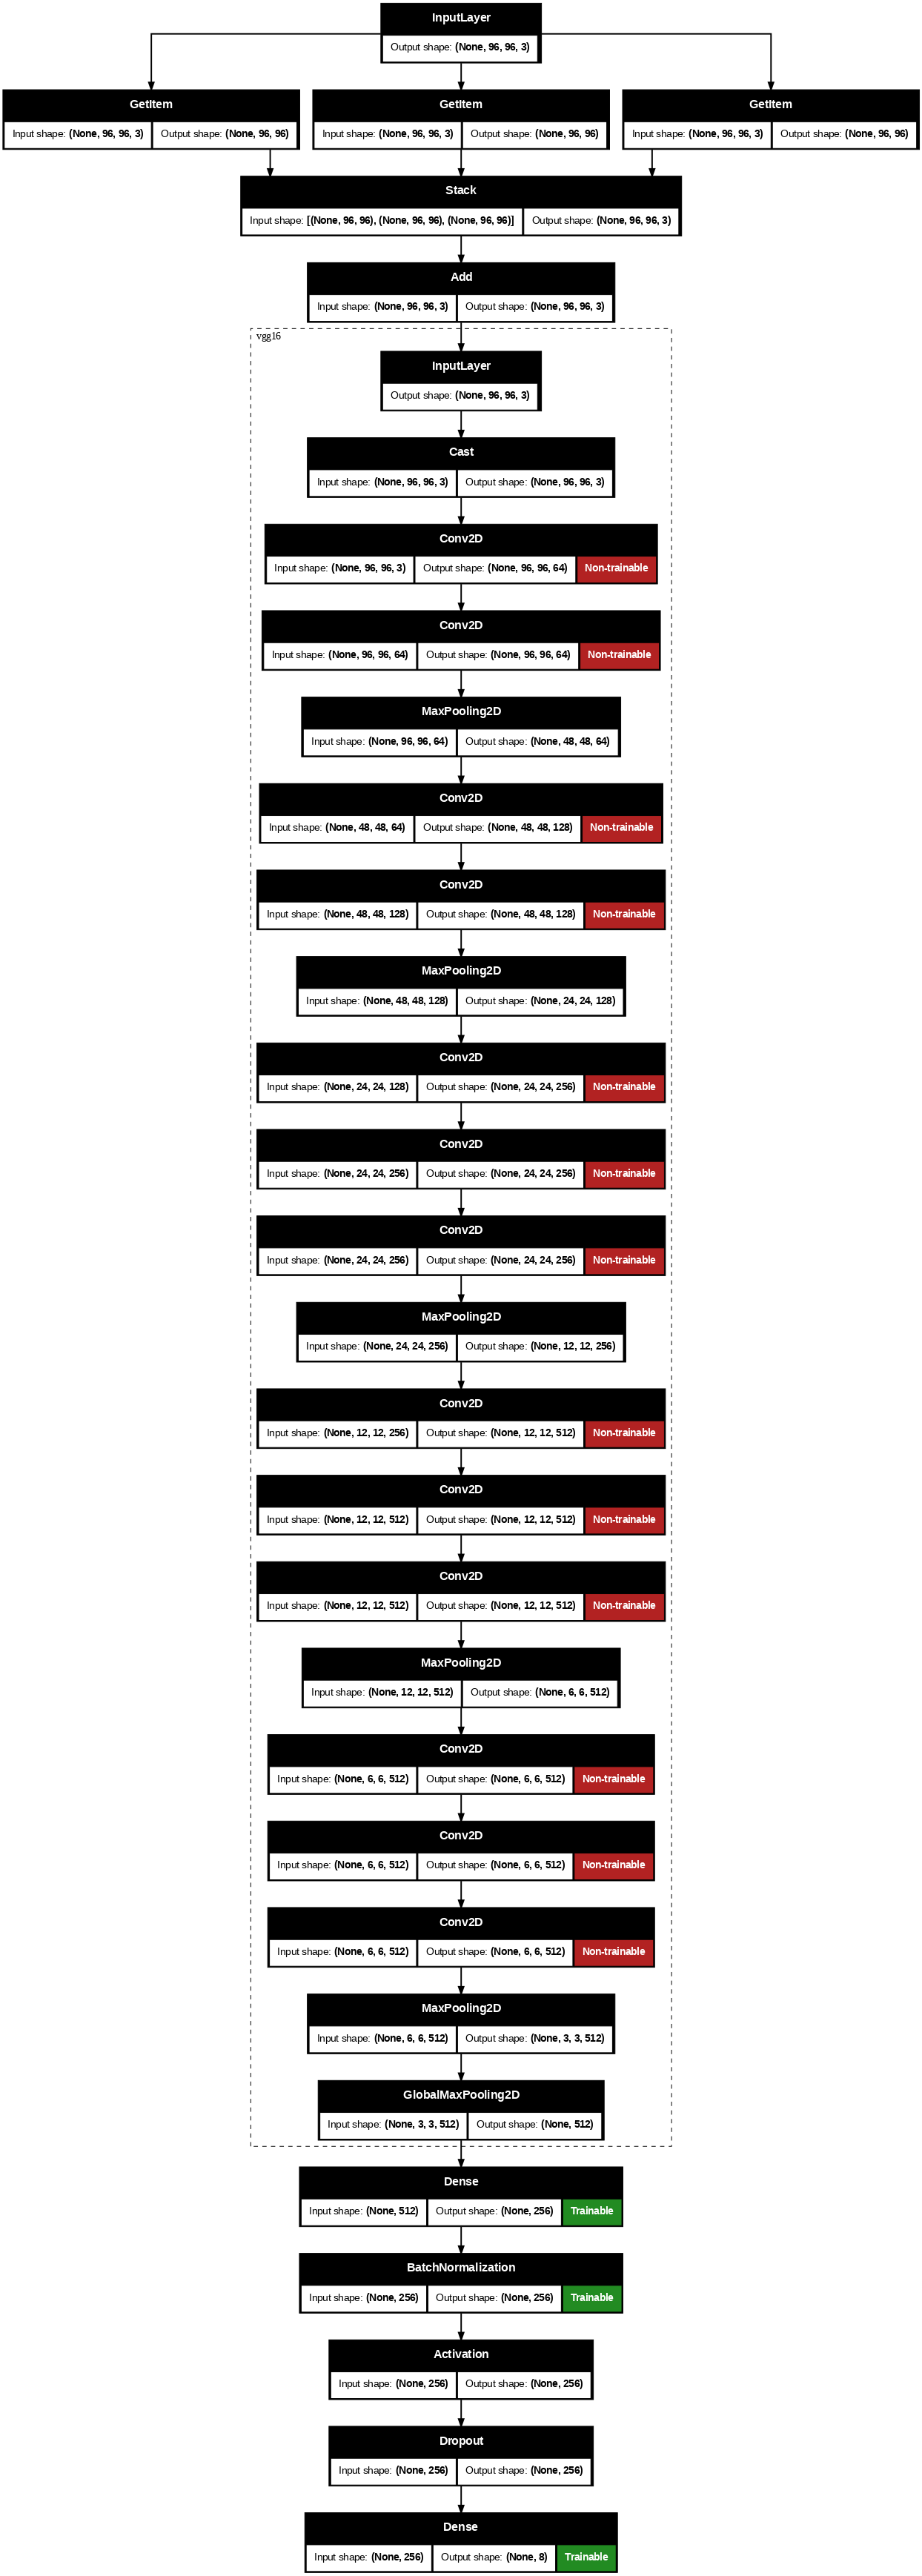

In [ ]:
#Fine tuning
ft_model = tfk.models.load_model('8_TL.keras')

# Display a summary of the model architecture
ft_model.summary(expand_nested=True)

# Display model architecture with layer shapes and trainable parameters
tfk.utils.plot_model(ft_model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

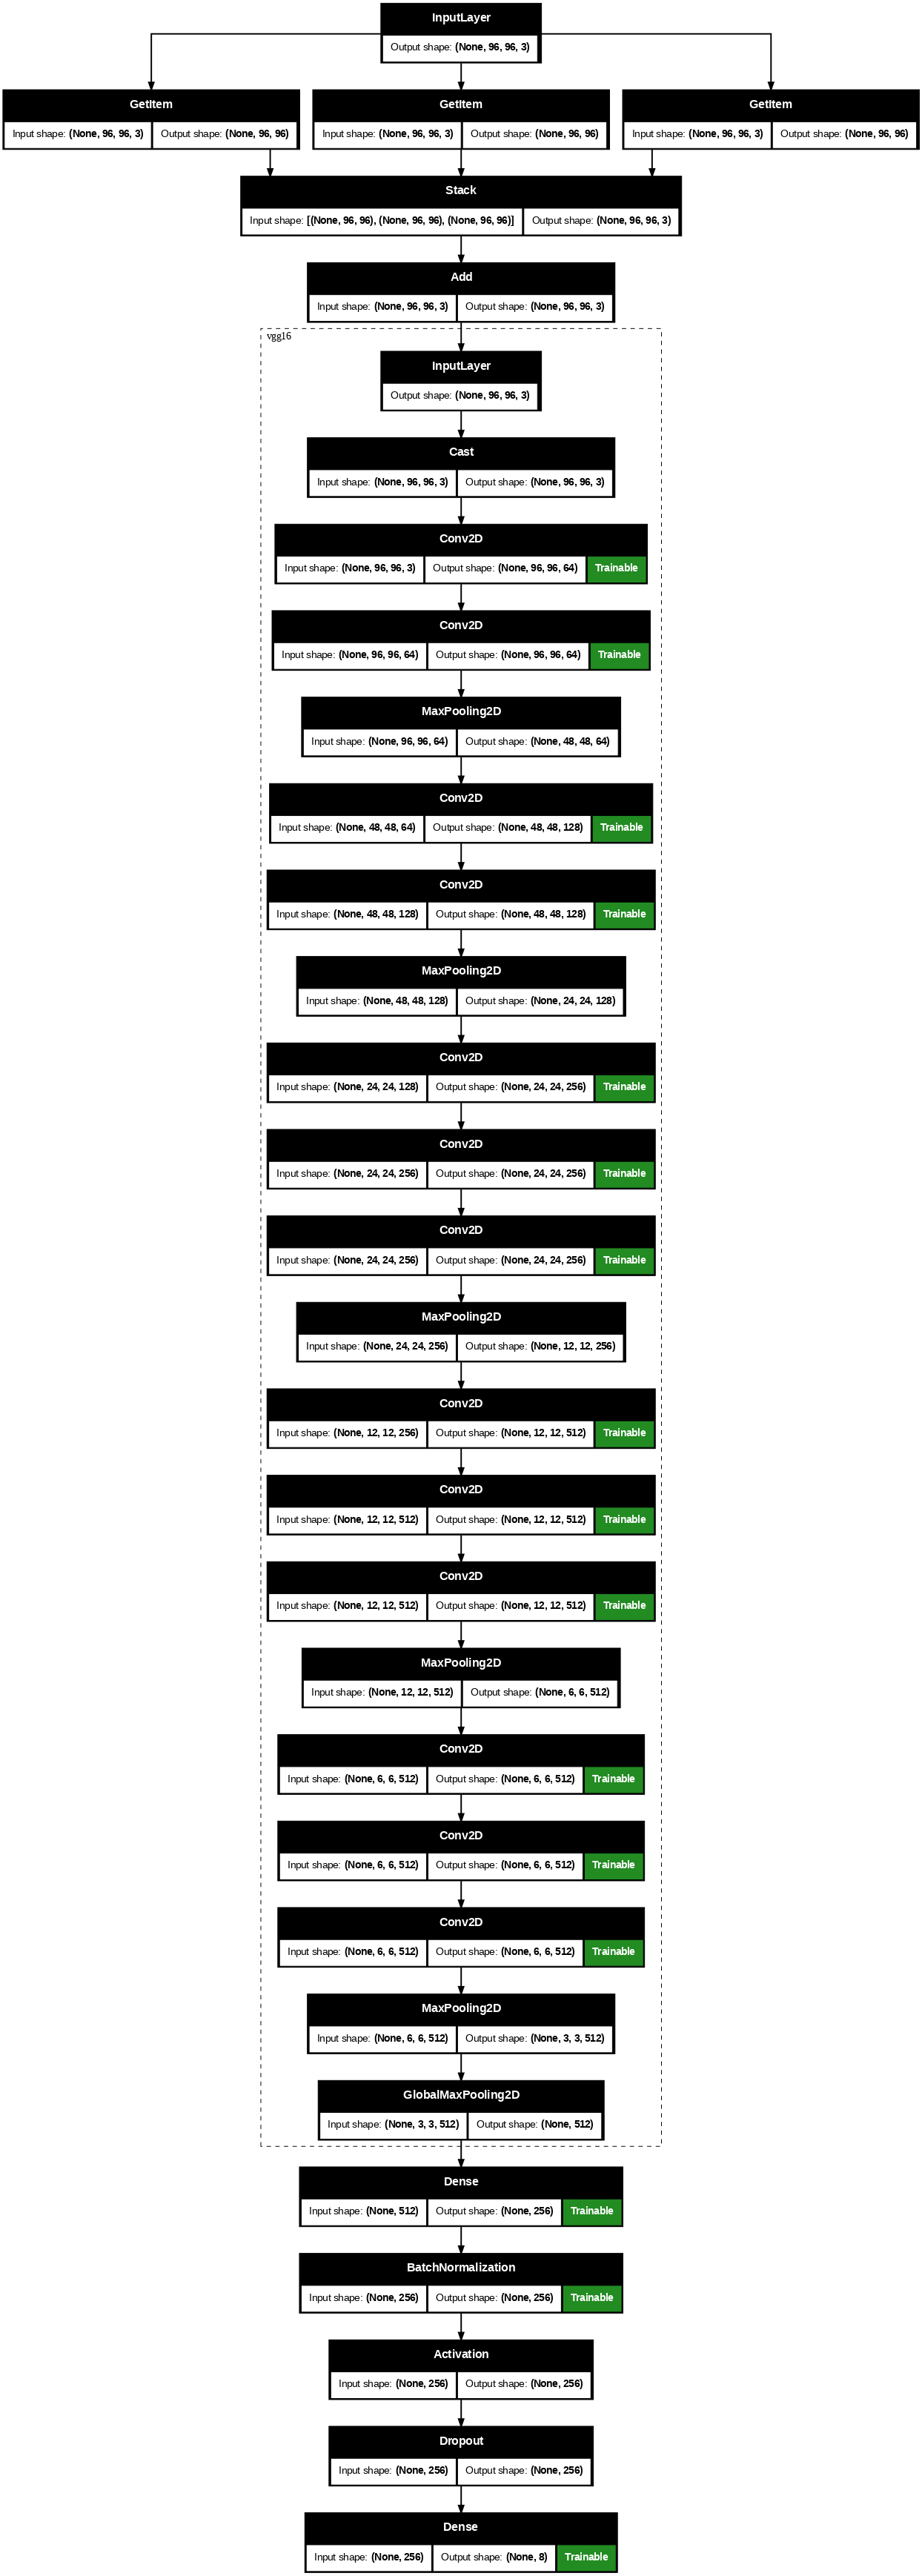

In [ ]:
# Set the MobileNetV3Small model layers as trainable
ft_model.get_layer('vgg16').trainable = True

# Set all MobileNetV3Small layers as non-trainable
for layer in ft_model.get_layer('vgg16').layers:
    layer.trainable = True
tfk.utils.plot_model(ft_model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

0 input_layer False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 True
8 block3_conv2 True
9 block3_conv3 True
10 block3_pool True
11 block4_conv1 True
12 block4_conv2 True
13 block4_conv3 True
14 block4_pool True
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True
19 global_max_pooling2d True


Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 96, 96, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item (GetItem)        │ (None, 96, 96)         │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_1 (GetItem)      │ (None, 96, 96)         │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_2 (GetItem)      │ (None, 96, 96)         │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stack (Stack)             │ (None, 96, 96, 3)      │              0 │ get_item[0][0],        │
│                           │                        │                │ get_item_1[0][0],      │
│                           │                        │                │ get_item_2[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 96, 96, 3)      │              0 │ stack[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ vgg16 (Functional)        │ (None, 512)            │     14,714,688 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│    └ input_layer          │ (None, 96, 96, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│    └ block1_conv1         │ (None, 96, 96, 64)     │          1,792 │ -                      │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│    └ block1_conv2         │ (None, 96, 96, 64)     │         36,928 │ -                      │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│    └ block1_pool          │ (None, 48, 48, 64)     │              0 │ -                      │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│    └ block2_conv1         │ (None, 48, 48, 128)    │         73,856 │ -                      │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│    └ block2_conv2         │ (None, 48, 48, 128)    │        147,584 │ -                      │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│    └ block2_pool          │ (None, 24, 24, 128)    │              0 │ -                      │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│    └ block3_conv1         │ (None, 24, 24, 256)    │        295,168 │ -                      │
│ (Conv2D)             

 Total params: 14,982,998 (57.16 MB)

 Trainable params: 14,588,424 (55.65 MB)

 Non-trainable params: 260,672 (1018.25 KB)

 Optimizer params: 133,902 (523.07 KB)

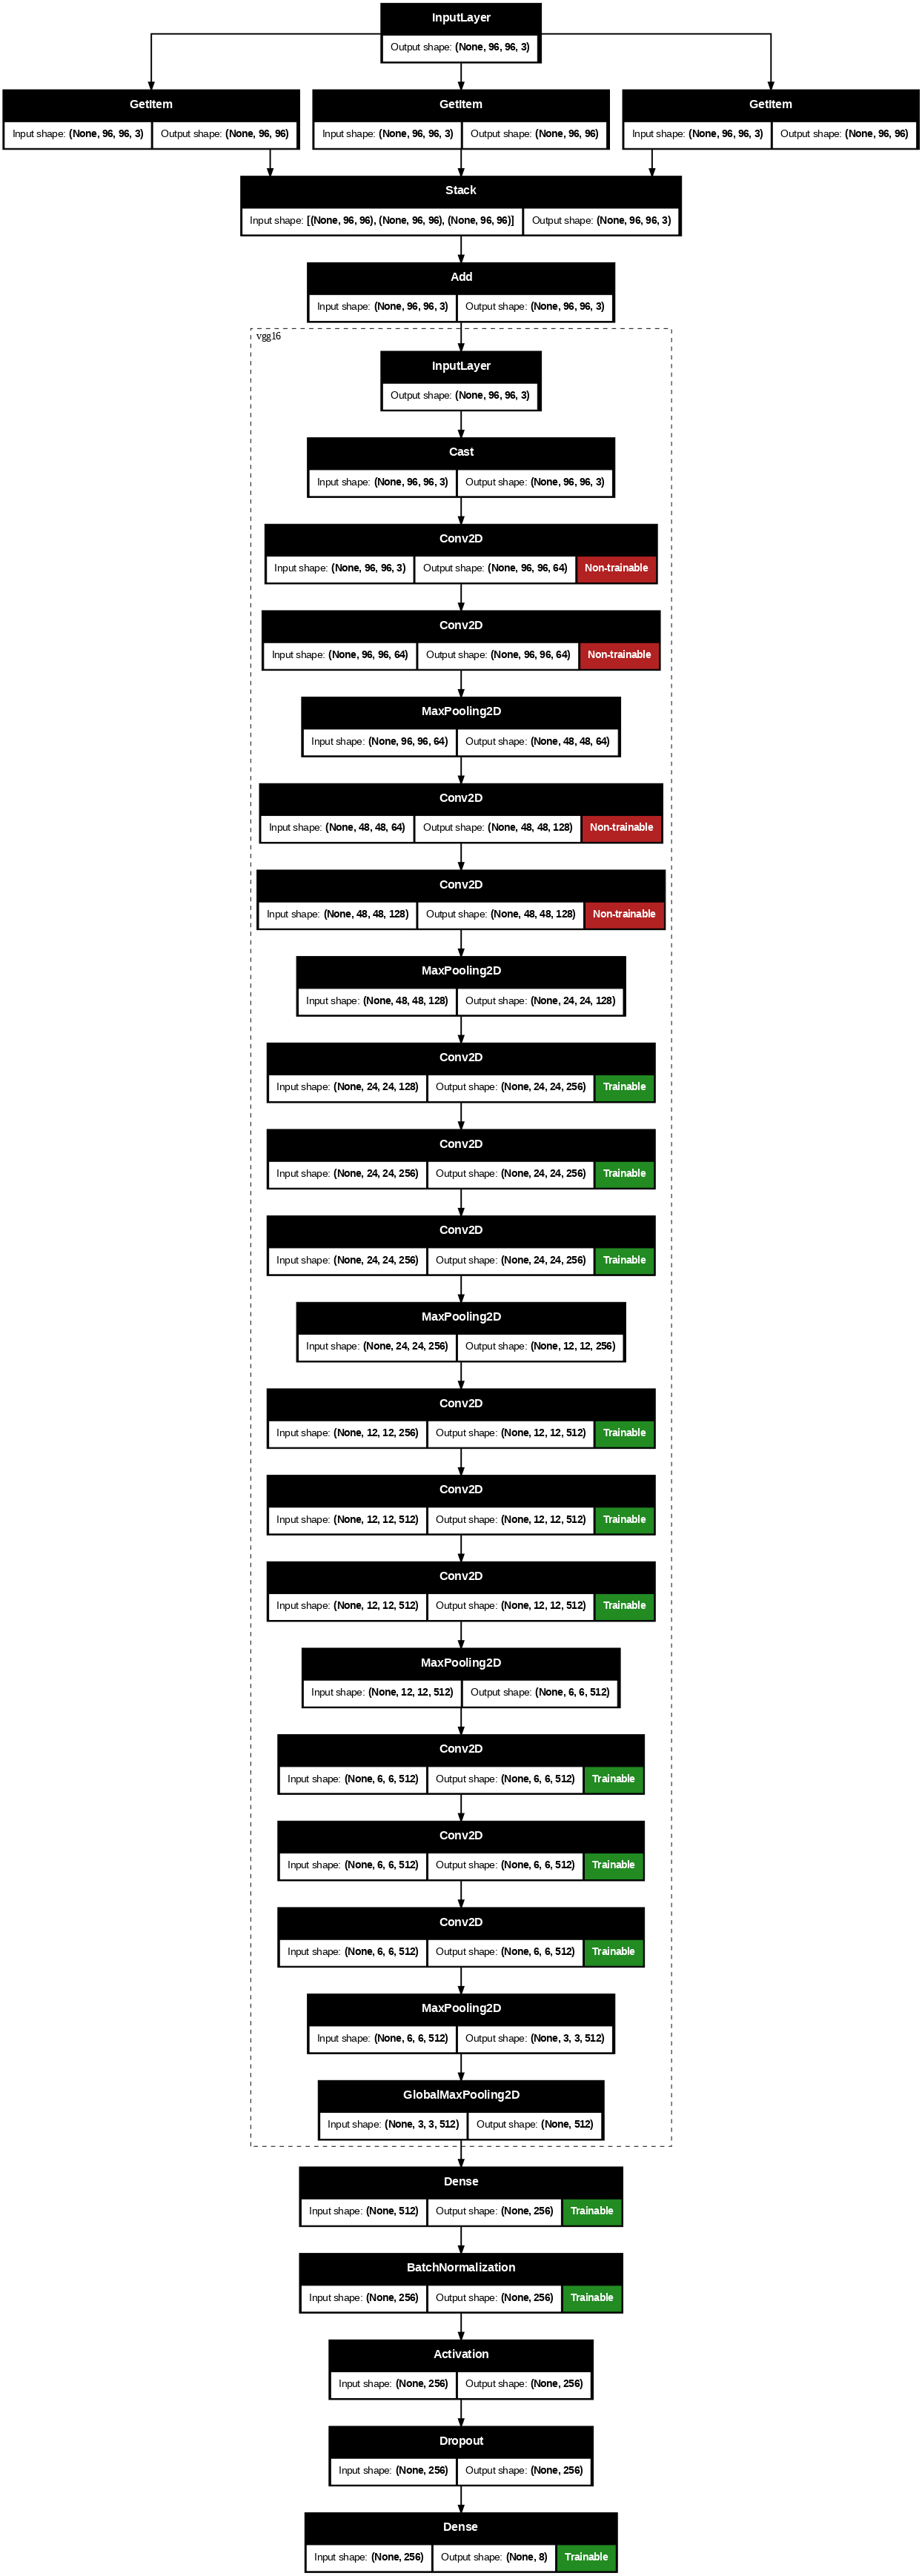

In [ ]:
# Set the number of layers to freeze
N = 7

# Set the first N layers as non-trainable
for i, layer in enumerate(ft_model.get_layer('vgg16').layers[:N]):
    layer.trainable = False

# Print layer indices, names, and trainability status
for i, layer in enumerate(ft_model.get_layer('vgg16').layers):
    print(i, layer.name, layer.trainable)

# Display a summary of the model architecture
ft_model.summary(expand_nested=True)

# Display model architecture with layer shapes and trainable parameters
tfk.utils.plot_model(ft_model, expand_nested=True, show_trainable=True, show_shapes=True, dpi=70)

In [ ]:
ft_model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Lion(0.00001), metrics=['accuracy'])

In [ ]:
# Fine-tune the model
ft_history = ft_model.fit(
    x = images_train,
    y = labels_train,
    batch_size = 50,
    epochs = 200,
    validation_data = (images_val, labels_val),
    callbacks = [tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=10, restore_best_weights=True)]
).history

# Calculate and print the final validation accuracy
final_val_accuracy = round(max(ft_history['val_accuracy'])* 100, 2)
print(f'Final validation accuracy: {final_val_accuracy}%')

# Save the trained model to a file with the accuracy included in the filename
model_filename = '9_FT.keras'
ft_model.save(model_filename)

print(ft_model.evaluate(images_test, labels_test))

# Delete the model to free up resources
del ft_model

Epoch 1/200
320/320 ━━━━━━━━━━━━━━━━━━━━ 34s 45ms/step - accuracy: 0.8018 - loss: 0.5969 - val_accuracy: 0.8993 - val_loss: 0.4564
Epoch 2/200
320/320 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.7514 - loss: 0.7748 - val_accuracy: 0.9460 - val_loss: 0.1956
Epoch 3/200
320/320 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.8306 - loss: 0.4968 - val_accuracy: 0.9507 - val_loss: 0.1974
Epoch 4/200
320/320 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.8823 - loss: 0.3355 - val_accuracy: 0.9613 - val_loss: 0.1622
Epoch 5/200
320/320 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.9201 - loss: 0.2273 - val_accuracy: 0.9447 - val_loss: 0.2479
Epoch 6/200
320/320 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.9429 - loss: 0.1637 - val_accuracy: 0.9440 - val_loss: 0.2511
Epoch 7/200
320/320 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.9494 - loss: 0.1378 - val_accuracy: 0.9527 - val_loss: 0.2404
Epoch 8/200
320/320 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.9598 - loss: 0

## 📊 Prepare your submission

In [ ]:
%%writefile model.py
import numpy as np

import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl


class Model:
    def __init__(self):
        """
        Initialize the internal state of the model. Note that the __init__
        method cannot accept any arguments.

        The following is an example loading the weights of a pre-trained
        model.
        """
        self.neural_network = tfk.models.load_model('9_FT.keras')

    def predict(self, X):
        """
        Predict the labels corresponding to the input X. Note that X is a numpy
        array of shape (n_samples, 96, 96, 3) and the output should be a numpy
        array of shape (n_samples,). Therefore, outputs must no be one-hot
        encoded.

        The following is an example of a prediction from the pre-trained model
        loaded in the __init__ method.
        """
        if X.max() < 2:
            X = (X * 255.0).astype('float32')  # Normalize to the range [0, 1]

        preds = self.neural_network.predict(X)
        if len(preds.shape) == 2:
            preds = np.argmax(preds, axis=1)
        return preds

Overwriting model.py


In [ ]:
from datetime import datetime
filename = f'submission_{datetime.now().strftime("%y%m%d_%H%M%S")}.zip'

# Add files to the zip command if needed
!zip {filename} model.py 9_FT.keras

from google.colab import files
files.download(filename)

  adding: model.py (deflated 54%)
  adding: 9_FT.keras (deflated 6%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 😖 Confusion Matrix

In [ ]:
data_val=np.load("../data_validation.npz")

images_val=data_val["images"]
labels_val=data_val["labels"]
images_val, images_test, labels_val, labels_test = train_test_split(
    images_val,
    labels_val,
    test_size=459,
    random_state=seed,
    stratify=labels_val
)
del data_val

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step


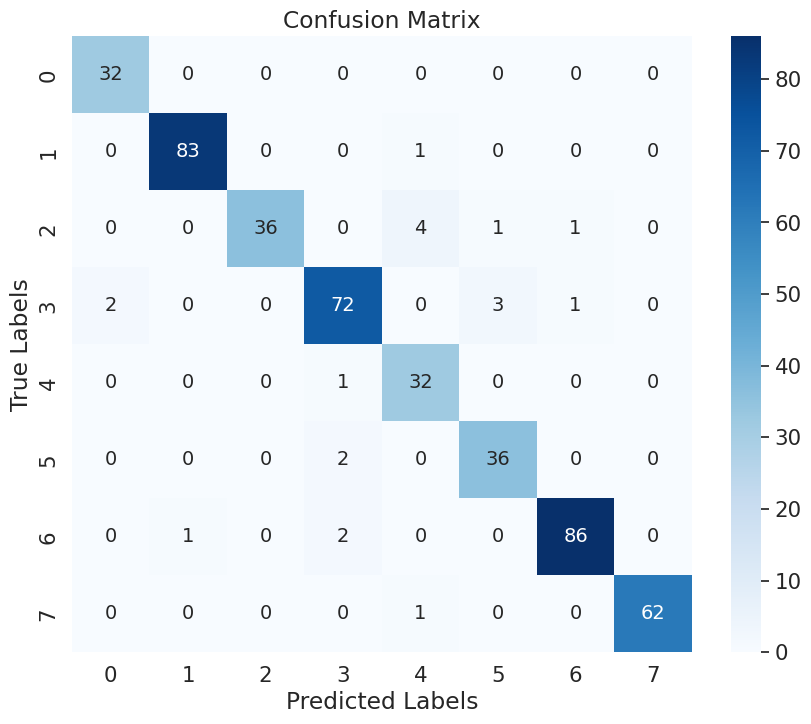

In [ ]:
ft_model = tfk.models.load_model('9_FT.keras')

from sklearn.metrics import confusion_matrix

# Predict the labels for the test set
predictions = ft_model.predict(images_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(labels_test, axis=1)

# Create the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

del ft_model